In [ ]:
%load_ext autoreload
%autoreload 2

#########################################################################################
#########################################################################################
####### BEGIN OPTIONAL SECTION
#########################################################################################
#########################################################################################
GLB_INSTALL_DEPENDENCIES = True

# Here to define dependencies
if GLB_INSTALL_DEPENDENCIES:
    !pip install transformers
#########################################################################################
#########################################################################################
####### END OPTIONAL SECTION
#########################################################################################
#########################################################################################

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import src.classification_model_utilities as mlclassif_utilities
import src.general_utilities as gral_utilities

In [ ]:
# Global variables

GLB_TRAINING_AND_VALIDATION = "training_and_val"
GLB_TEST = "test"
GLB_ACTIVE_TRAINING = "active_learning"
bert_base_model = "bert-base-uncased"
hate_bert_model = "GroNLP/hateBERT"
LCL_PATH_PLOTS = "plots"

# Analysis **bert-base-uncased** vs. **hateBert**

## Active Learning without Cross-Validation

In [ ]:
# JSON file paths with statistics
bert_base_actLrng_woCV = "" # Write the path here
hate_bert_actLrng_woCV = "" # Write the path here

### Read JSON files and store them into JSON Objects

In [ ]:
json_bert_base_actLrng_woCV = gral_utilities.read_json_file(
                        bert_base_actLrng_woCV
                )
    

json_hate_bert_actLrng_woCV = gral_utilities.read_json_file(
                        hate_bert_actLrng_woCV
                )

"""
# Fill in the following JSON depending on the # of splits and sizes of each set (train, val, and test)
json_lengths_base_bert = [
  { "id_split": 1  , "length_training": ###, "length_validation": ###, "length_test": ###},
  { "id_split": 2  , "length_training": ###, "length_validation": ###, "length_test": ###},
  ...
  { "id_split": n-1, "length_training": ###, "length_validation": ###, "length_test": ###},
  { "id_split": n  , "length_training": ###, "length_validation": ###, "length_test": ###},
]
# As an example, there is an example below
"""

json_lengths_base_bert = [
    { "id_split": 1, "length_training": 2041, "length_validation": 227, "length_test": 120},
    { "id_split": 2, "length_training": 4083, "length_validation": 454, "length_test": 239},
    { "id_split": 3, "length_training": 6124, "length_validation": 681, "length_test": 359},
    { "id_split": 4, "length_training": 8166, "length_validation": 908, "length_test": 478},
    { "id_split": 5, "length_training": 10208, "length_validation": 1131, "length_test": 597},
    { "id_split": 6, "length_training": 12249, "length_validation": 1362, "length_test": 717},
    { "id_split": 7, "length_training": 14292, "length_validation": 1588, "length_test": 836},
    { "id_split": 8, "length_training": 16333, "length_validation": 1815, "length_test": 956}
]

In [ ]:
df_statistics_bert_base = mlclassif_utilities.get_df_statistics_model_with_active_training(
    json_bert_base_actLrng_woCV[GLB_ACTIVE_TRAINING], 
    json_lengths_base_bert,
    bert_base_model
)
df_statistics_bert_base

In [ ]:
df_statistics_hate_bert = mlclassif_utilities.get_df_statistics_model_with_active_training(
    json_hate_bert_actLrng_woCV[GLB_ACTIVE_TRAINING], 
    json_lengths_base_bert,
    hate_bert_model
)
df_statistics_hate_bert

In [ ]:
df_statistics_bert_AL = pd.concat([df_statistics_bert_base, df_statistics_hate_bert])
df_statistics_bert_AL

,model,id_split,epoch,Training Loss,Training Accur.,Training Precision (macro),Training Precision (micro),Training Recall (macro),Training Recall (micro),Training F1 (macro),...,Test Accur.,Test Precision (macro),Test Precision (micro),Test Recall (macro),Test Recall (micro),Test F1 (macro),Test F1 (micro),length_training,length_validation,length_test
0,bert-base-uncased,1,1,0.510297,0.839257,0.572001,0.839257,0.539321,0.839257,0.539282,...,0.863542,0.732575,0.863542,0.806225,0.863542,0.759412,0.863542,2041,227,120
1,bert-base-uncased,1,2,0.421809,0.867315,0.433657,0.867315,0.500000,0.867315,0.464448,...,0.863542,0.732575,0.863542,0.806225,0.863542,0.759412,0.863542,2041,227,120
2,bert-base-uncased,1,3,0.360536,0.881920,0.864802,0.881920,0.565375,0.881920,0.577868,...,0.863542,0.732575,0.863542,0.806225,0.863542,0.759412,0.863542,2041,227,120
3,bert-base-uncased,1,4,0.313913,0.926657,0.894747,0.926657,0.735196,0.926657,0.785690,...,0.863542,0.732575,0.863542,0.806225,0.863542,0.759412,0.863542,2041,227,120
4,bert-base-uncased,2,1,0.472969,0.859264,0.552499,0.859264,0.506192,0.859264,0.478080,...,0.877201,0.742119,0.877201,0.693640,0.877201,0.711617,0.877201,4083,454,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,GroNLP/hateBERT,7,4,0.264591,0.961190,0.923177,0.961190,0.908217,0.961190,0.915435,...,0.920902,0.824094,0.920902,0.810945,0.920902,0.816118,0.920902,14292,1588,836
28,GroNLP/hateBERT,8,1,0.389041,0.878780,0.690362,0.878780,0.552708,0.878780,0.552136,...,0.940076,0.848640,0.940076,0.864221,0.940076,0.855908,0.940076,16333,1815,956
29,GroNLP/hateBERT,8,2,0.306111,0.927402,0.851933,0.927402,0.824518,0.927402,0.837109,...,0.940076,0.848640,0.940076,0.864221,0.940076,0.855908,0.940076,16333,1815,956
30,GroNLP/hateBERT,8,3,0.277482,0.950677,0.899888,0.950677,0.881658,0.950677,0.890388,...,0.940076,0.848640,0.940076,0.864221,0.940076,0.855908,0.940076,16333,1815,956


In [ ]:
columns = ["Valid. F1 (macro)",
           "Valid. Recall (macro)"]

for col in columns:

    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col, 
        bestMetricSelection=False
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwoCV-woSmSel"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)

    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col, 
        bestMetricSelection=True,
        _loc="lower right"
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwoCV-SmSel"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)

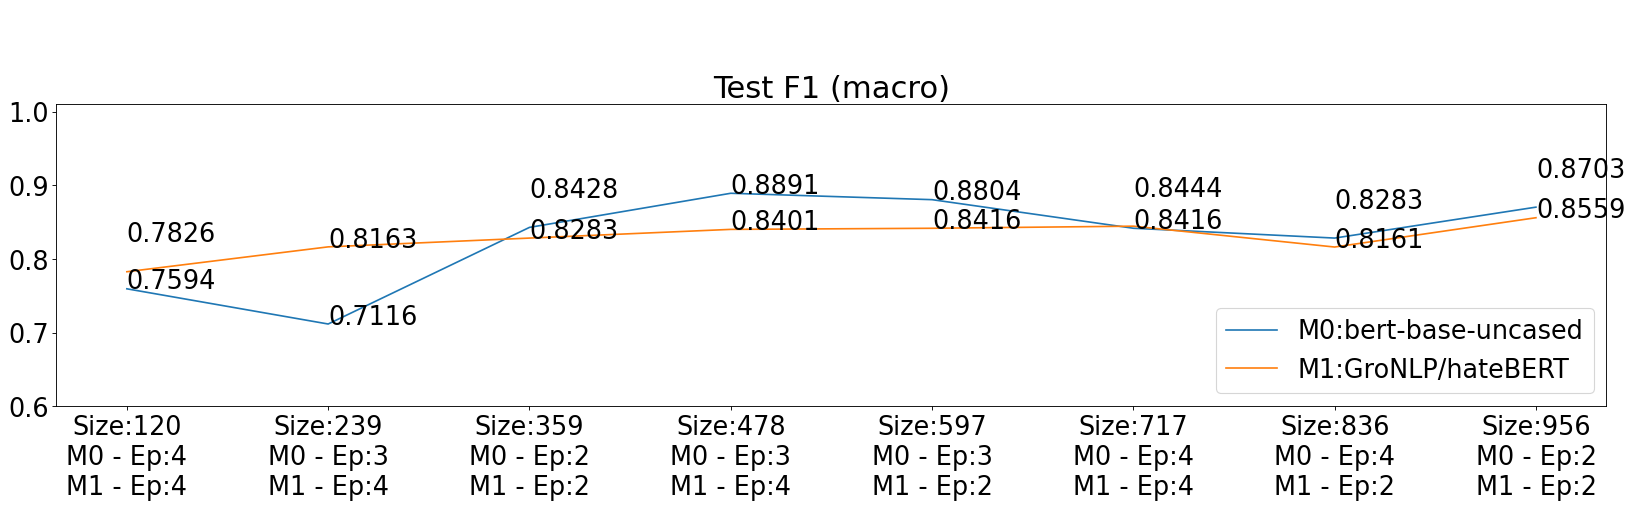

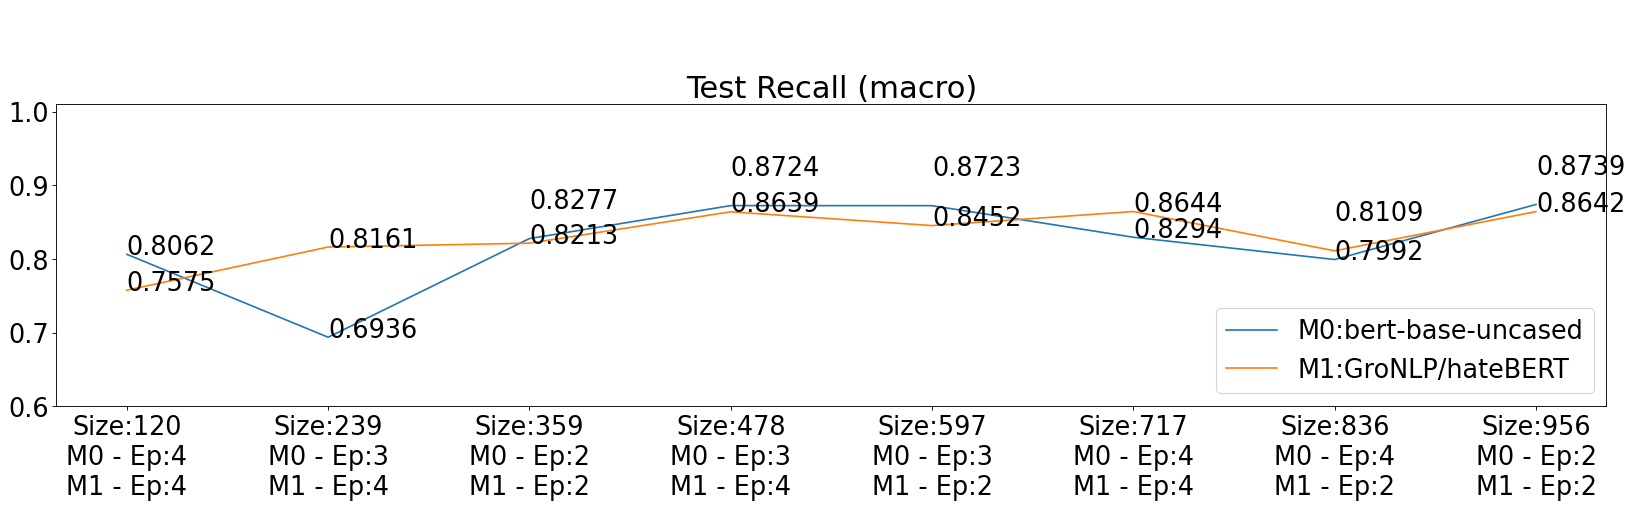

In [ ]:
columns = ["Test F1 (macro)",
           "Test Recall (macro)"]

"""
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 23}
plt.rc('font', **font)
"""

for col in columns:
    plot = mlclassif_utilities.draw_statistics_of_models_ac_spec_paper(
        df_statistics_bert_AL, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col, 
        bestMetricSelection=True,
        _loc="lower right",
        y_lim_min=0.6,
        y_lim_max=1.01,
        y_lim_interval=.05,
        size_x = 25,
        size_y = 5
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwoCV-SmSel"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)

## Active learning with Cross-Validation

In [ ]:
# JSON file paths with statistics
bert_base_actLrng_wCV = "" # Write the path here
hate_bert_actLrng_wCV = "" # Write the path here

### Read JSON files and store them into JSON Objects

In [ ]:

json_bert_base_actLrng_wCV = gral_utilities.read_json_file(
                        bert_base_actLrng_wCV
                )

json_hate_bert_actLrng_wCV = gral_utilities.read_json_file(
                        hate_bert_actLrng_wCV
                )

"""
# Fill in the following JSON depending on the # of splits and sizes of each set (train, val, and test)
json_lengths_base_bert = [
  { "id_split": 1  , "length_training": ###, "length_validation": ###, "length_test": ###},
  { "id_split": 2  , "length_training": ###, "length_validation": ###, "length_test": ###},
  ...
  { "id_split": n-1, "length_training": ###, "length_validation": ###, "length_test": ###},
  { "id_split": n  , "length_training": ###, "length_validation": ###, "length_test": ###},
]
# As an example, there is an example below
"""

### Fill in the followin JSON list accordingly to the number of splits (AL) and the sets (train, val, and test)
json_lengths_cv_bert = [
    { "id_split": 1, "length_training": 1719, "length_validation": 430, "length_test": 239},
    { "id_split": 2, "length_training": 3438, "length_validation": 859, "length_test": 478},
    { "id_split": 3, "length_training": 5158, "length_validation": 1289, "length_test": 717},
    { "id_split": 4, "length_training": 6877, "length_validation": 1719, "length_test": 956},
    { "id_split": 5, "length_training": 8597, "length_validation": 2149, "length_test": 1194},
    { "id_split": 6, "length_training": 10316, "length_validation": 2579, "length_test": 1433},
    { "id_split": 7, "length_training": 12035, "length_validation": 3008, "length_test": 1672},
    { "id_split": 8, "length_training": 13754, "length_validation": 3439, "length_test": 1911}
]



In [ ]:
df_statistics_bert_base_ac_cv = mlclassif_utilities.get_df_statistics_model_with_active_training_and_cross_validation(
    json_bert_base_actLrng_wCV[GLB_ACTIVE_TRAINING], 
    json_lengths_cv_bert,
    bert_base_model
)
df_statistics_bert_base_ac_cv

In [ ]:
df_statistics_hate_bert_ac_cv = mlclassif_utilities.get_df_statistics_model_with_active_training_and_cross_validation(
    json_hate_bert_actLrng_wCV[GLB_ACTIVE_TRAINING], 
    json_lengths_hate_bert,
    hate_bert_model
)
df_statistics_hate_bert_ac_cv

In [ ]:
df_statistics_bert_AL_CV = pd.concat([df_statistics_bert_base_ac_cv, df_statistics_hate_bert_ac_cv])
df_statistics_bert_AL_CV

,model,id_split,id_cross_val_x,epoch,Training Loss,Training Accur.,Training Precision (macro),Training Precision (micro),Training Recall (macro),Training Recall (micro),...,Test Accur.,Test Precision (macro),Test Precision (micro),Test Recall (macro),Test Recall (micro),Test F1 (macro),Test F1 (micro),length_training,length_validation,length_test
0,GroNLP/hateBERT,1,1,1,0.483677,0.873703,0.436852,0.873703,0.500000,0.873703,...,0.930985,0.829462,0.930985,0.863785,0.930985,0.842749,0.930985,1719,430,239
1,GroNLP/hateBERT,1,1,2,0.437887,0.848623,0.424312,0.848623,0.500000,0.848623,...,0.930985,0.829462,0.930985,0.863785,0.930985,0.842749,0.930985,1719,430,239
2,GroNLP/hateBERT,1,1,3,0.396647,0.867255,0.609315,0.867255,0.504883,0.867255,...,0.930985,0.829462,0.930985,0.863785,0.930985,0.842749,0.930985,1719,430,239
3,GroNLP/hateBERT,1,2,1,0.359397,0.892251,0.820671,0.892251,0.649976,0.892251,...,0.930985,0.829462,0.930985,0.863785,0.930985,0.842749,0.930985,1719,430,239
4,GroNLP/hateBERT,1,2,2,0.327805,0.919164,0.847173,0.919164,0.738627,0.919164,...,0.930985,0.829462,0.930985,0.863785,0.930985,0.842749,0.930985,1719,430,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,GroNLP/hateBERT,8,4,2,0.221522,0.990375,0.980599,0.990375,0.977660,0.990375,...,0.925619,0.810653,0.925619,0.889149,0.925619,0.842496,0.925619,13754,3439,1911
116,GroNLP/hateBERT,8,4,3,0.214088,0.993995,0.989285,0.993995,0.985387,0.993995,...,0.925619,0.810653,0.925619,0.889149,0.925619,0.842496,0.925619,13754,3439,1911
117,GroNLP/hateBERT,8,5,1,0.218165,0.992092,0.983006,0.992092,0.982373,0.992092,...,0.925619,0.810653,0.925619,0.889149,0.925619,0.842496,0.925619,13754,3439,1911
118,GroNLP/hateBERT,8,5,2,0.211053,0.993071,0.985244,0.993071,0.984069,0.993071,...,0.925619,0.810653,0.925619,0.889149,0.925619,0.842496,0.925619,13754,3439,1911


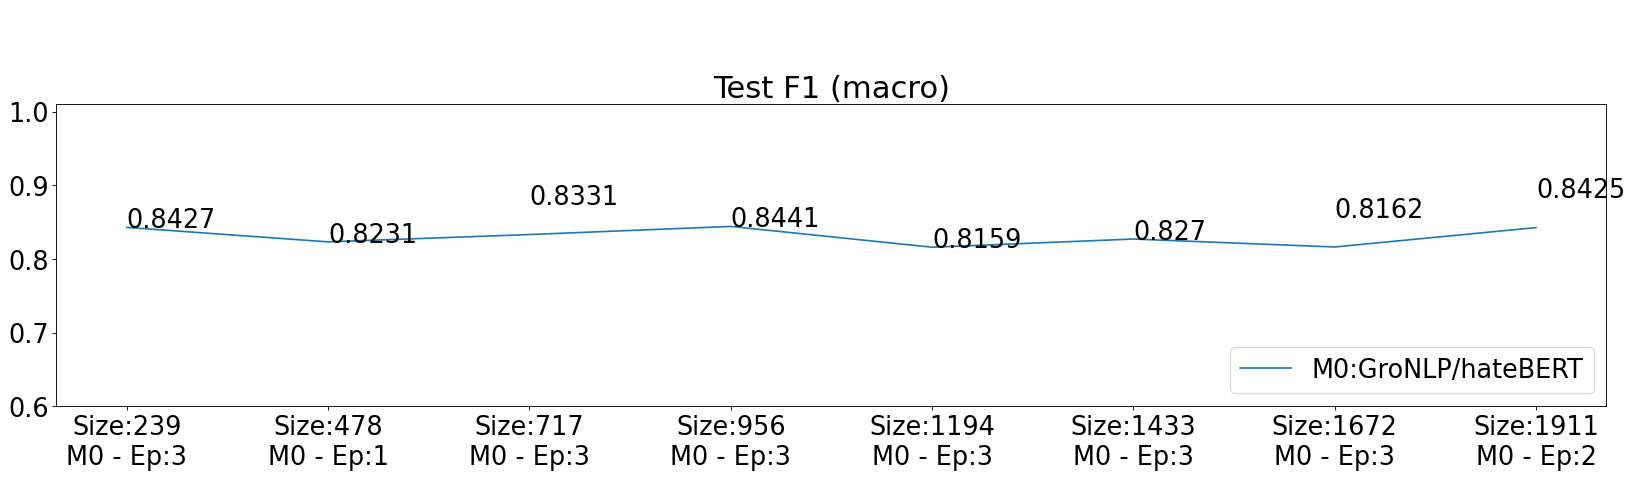

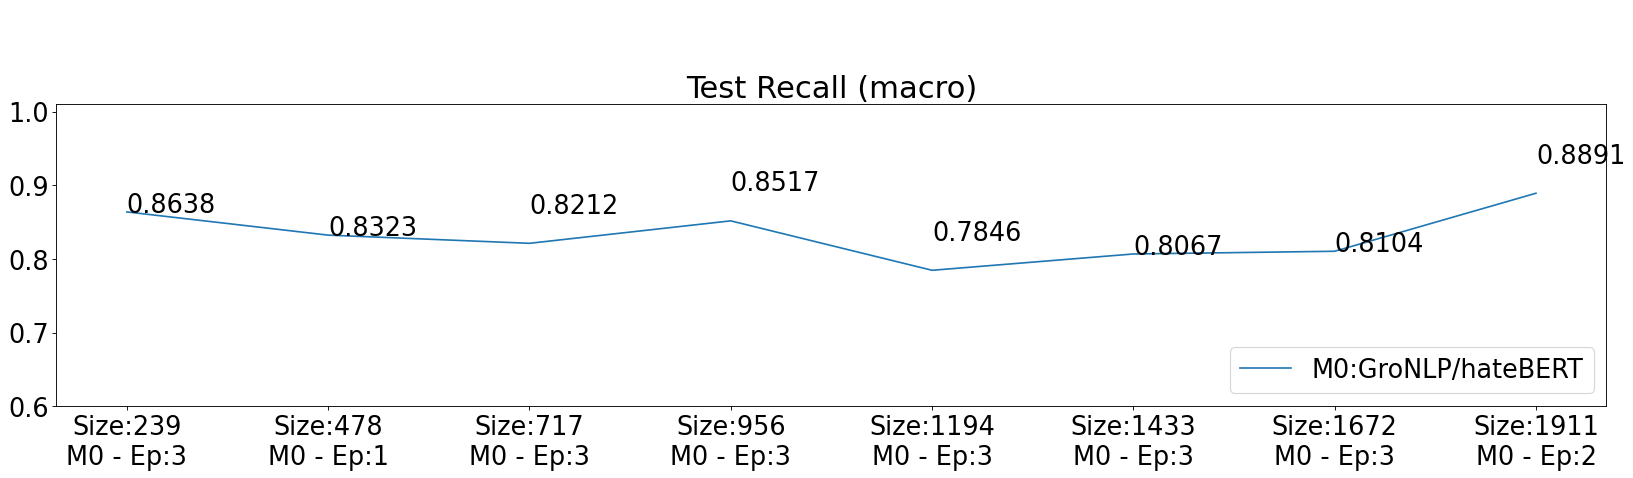

In [ ]:
columns = ["Test F1 (macro)",
           "Test Recall (macro)"]

"""
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 23}
plt.rc('font', **font)
"""

for col in columns:
    plot = mlclassif_utilities.draw_statistics_of_models_ac_spec_paper(
        df_statistics_bert_AL_CV, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col, 
        bestMetricSelection=True,
        dfHasCrossValidation=True,
        _loc="lower right",
        y_lim_min=0.6,
        y_lim_max=1.01,
        y_lim_interval=.05,
        size_x = 25,
        size_y = 5
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwoCV-SmSel"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)

In [ ]:
columns = ["Valid. F1 (macro)",
           "Valid. Recall (macro)",
           "Valid. Recall (micro)",
           "Valid. F1 (micro)"]

for col in columns:
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL_CV, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col,
        bestMetricSelection=False,
        dfHasCrossValidation=True
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwCV-woSmSel"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)
    plot = mlclassif_utilities.draw_statistics_of_models_ac(
        df_statistics_bert_AL_CV, 
        col, 
        withLabelsInPlot=True, 
        showPlot=True, showScatter=True, 
        _title=col, 
        bestMetricSelection=True,
        dfHasCrossValidation=True
    )
    #col_name = col.replace(".", "").replace("(", "-").replace(")", "").replace(" ", "") + "-ALwCV-SmSel"
    #mlclassif_utilities.save_plot(plot, path=LCL_PATH_PLOTS, pattern=col_name)